In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
data = pd.read_csv('Amazon-Products.csv', sep = ',')

data = data.drop('Unnamed: 0', axis=1)
data.tail()
#nomnre de lignes et de colonnes
print(f"nombre de lignes : {data.shape[0]}")
data.isnull().sum()  #celle ligne permet de voir les valeurs manquantes

#remplacer les valeurs manquantes



nombre de lignes : 551585


name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [4]:
# nettoyer les colonnes et remplacer les valeurs manquantes

data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['no_of_ratings'] = pd.to_numeric(data['no_of_ratings'], errors='coerce')

# Convert columns to string before using .str accessor
data['discount_price'] = data['discount_price'].astype(str).str.replace('₹', '').str.replace(',', '')
data['actual_price'] = data['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '')

data['discount_price'] = pd.to_numeric(data['discount_price'], errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')

data['ratings'] = data['ratings'].fillna(data['ratings'].mean())
data['no_of_ratings'] = data['no_of_ratings'].fillna(data['no_of_ratings'].median())

data['discount_price'] = data['discount_price'].fillna(data['discount_price'].mean())
data['actual_price'] = data['actual_price'].fillna(data['actual_price'].mean())



#creer de nouvelles colonnes 
data['discount_percentage'] = ((data['actual_price'] - data['discount_price']) / data['actual_price']) * 100
data['popularity'] = data['ratings'] * data['no_of_ratings']


#supprimons les doublons
data = data.drop_duplicates()


#encoder les valeurs categorielles
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['main_category'] = labelencoder.fit_transform(data['main_category'])
data['sub_category'] = labelencoder.fit_transform(data['sub_category'])

data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percentage,popularity
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,1,0,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,15.0,32999.0,58990.0,44.060010,63.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,1,0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,15.0,46490.0,75990.0,38.820897,63.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,1,0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,15.0,34490.0,61990.0,44.361994,63.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,1,0,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,44.934048,276.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,1,0,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,49.122289,2583.0


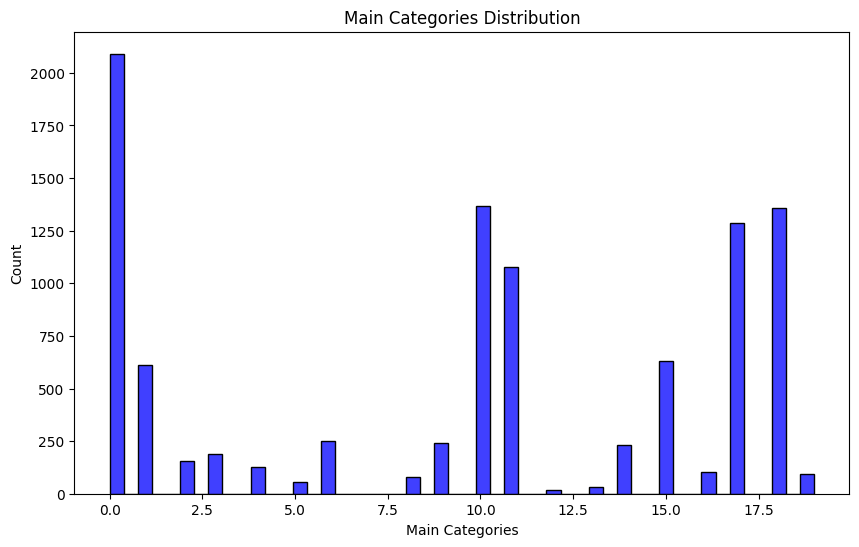

C:\Users\HP\AppData\Local\Temp\ipykernel_18312\3028427167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_main_categories.index, y=top_5_main_categories.values, palette='viridis')


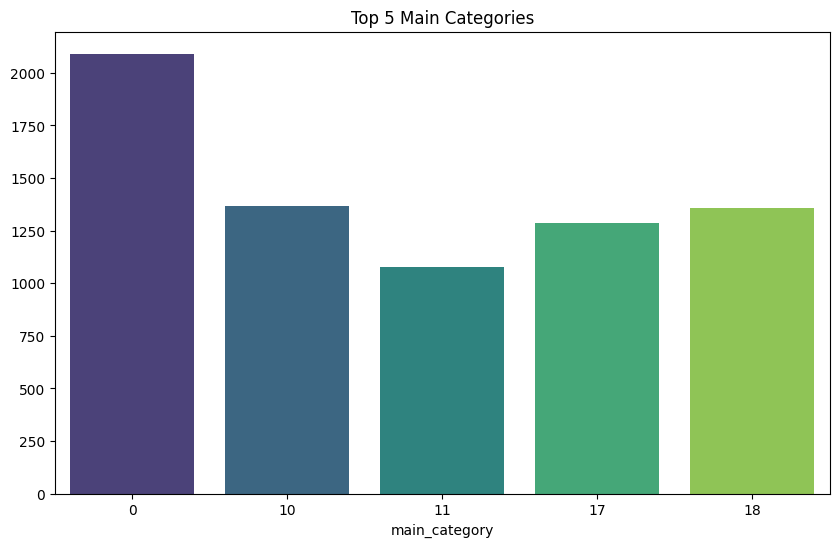

In [10]:
sample_df = data.sample(n=10000, random_state=42)

# histgarmme des categories les plus populaires
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_df, x='main_category', bins=50, color='blue')
plt.title('Main Categories Distribution')
plt.xlabel('Main Categories')
plt.ylabel('Count')
plt.show()

#top 5 des categories les plus populaires
top_5_main_categories = sample_df['main_category'].value_counts().head(5)  
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_main_categories.index, y=top_5_main_categories.values, palette='viridis')
plt.title('Top 5 Main Categories')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Normaliser les colonnes
scaler = StandardScaler()
data[['ratings', 'discount_price', 'actual_price', 'popularity']] = scaler.fit_transform(
    data[['ratings', 'discount_price', 'actual_price', 'popularity']]
)

# Calcul de similarité en utilisant NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='auto', metric='cosine').fit(
    data[['ratings', 'discount_price', 'actual_price', 'popularity']]
)

# Fonction de recommandation
def recommander(produit, nbrs, data, top_n=5):
    distances, indices = nbrs.kneighbors([data.iloc[produit][['ratings', 'discount_price', 'actual_price', 'popularity']]])
    similar_indices = indices[0][1:top_n+1]
    recommandation = data.iloc[similar_indices][['name', 'ratings', 'discount_price', 'actual_price', 'popularity']]
    return recommandation

# Recommander un produit
print(recommander(100, nbrs, data)) 

                                                     name   ratings  \
344224  Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp... -0.052208   
244834  Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp... -0.052208   
100     Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp... -0.052208   
532361  eKools Women's Winterwear Woolen Self Cardigan... -0.052208   
115421  eKools Women's Winterwear Woolen Self Cardigan... -0.052208   

        discount_price  actual_price  popularity  
344224    1.648208e-16 -7.189031e-19    4.659593  
244834    1.648208e-16 -7.189031e-19    4.659593  
100       1.648208e-16 -7.189031e-19    4.659593  
532361    1.648208e-16 -7.189031e-19    4.788746  
115421    1.648208e-16 -7.189031e-19    4.788746  


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [38]:
#moovielens 
movies = pd.read_csv('movies.csv') 
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')

tags['tag'] = tags['tag'].fillna('')

#concatener les tags
movies_with_links = pd.merge(movies, links, on='movieId', how='left')
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# merger les dataframes movies_with_links et movie_tags
movies_with_ratings = pd.merge(movies_with_links, ratings, on='movieId', how='left')

# Calculer la moyenne des ratings
mean_ratings = movies_with_ratings.groupby('movieId')['rating'].mean().reset_index()

# merger les dataframes
data = pd.merge(movies_with_links, movie_tags, on='movieId', how='left')
data = pd.merge(data, mean_ratings, on='movieId', how='left')

#ajouter une colone user_id
data['userId'] = np.random.randint(1, 86537, data.shape[0])

#ajouter une colonne popularity
data['popularity'] = data['rating'].groupby(data['movieId']).transform('count')



,movieId,title,genres,imdbId,tmdbId,tag,rating,userId,popularity
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,14418234,845861.0,NaN,3.5,58949,1
86533,288971,Ouija Japan (2021),Action|Horror,11162178,878958.0,NaN,0.5,644,1
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,70199,150392.0,NaN,4.0,39700,1
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,23050520,1102551.0,NaN,3.0,31700,1
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary,11644948,940588.0,NaN,3.0,35744,1
